<a href="https://www.kaggle.com/code/shimaazizi/california-housing-prices?scriptVersionId=136199196" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Read the dataset

In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Check data types

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Check number of unique value for object datatype for boolean or categorical conversion

In [5]:
{col : df[col].unique() for col in df if df[col].dtype == object}

{'ocean_proximity': array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
       dtype=object)}

In [6]:
df = df.astype(
    {
        'ocean_proximity' : 'category',
    }
)

In [7]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


For the column 'ocean_proximity'do an alternative encoding scheme such as one-hot encoding.

Perform one-hot encoding using get_dummies() function

In [9]:
encoded_df = pd.get_dummies(
    df['ocean_proximity'],
    prefix='proximity'
)

Concatenate the encoded columns with the original DataFrame

In [10]:
df = pd.concat([df, encoded_df], axis=1)

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [12]:
df.dtypes

longitude                float64
latitude                 float64
housing_median_age       float64
total_rooms              float64
total_bedrooms           float64
population               float64
households               float64
median_income            float64
median_house_value       float64
ocean_proximity         category
proximity_<1H OCEAN        uint8
proximity_INLAND           uint8
proximity_ISLAND           uint8
proximity_NEAR BAY         uint8
proximity_NEAR OCEAN       uint8
dtype: object

so now we can should drop ocean_proximity column

In [13]:
df.drop(columns='ocean_proximity', inplace=True)

Check correlations

In [14]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [15]:
df.corr().style.background_gradient(cmap='YlGnBu')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [16]:
df.corr()[['median_house_value']].style.background_gradient(cmap='YlOrBr')

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000
proximity_<1H OCEAN,0.256617


In [17]:
abs(df.corr())[['median_house_value']].style.background_gradient(cmap='YlOrBr')

,median_house_value
longitude,0.045967
latitude,0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000
proximity_<1H OCEAN,0.256617


Get max

In [18]:
df.corr().style.highlight_max(axis=0)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


Get min

In [19]:
df.corr().style.highlight_min(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [20]:
abs(df.corr()).style.highlight_min(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
longitude,1.000000,0.924664,0.108197,0.044568,0.069608,0.099773,0.055310,0.015176,0.045967,0.321121,0.055575,0.009446,0.474489,0.045509
latitude,0.924664,1.000000,0.011173,0.036100,0.066983,0.108785,0.071035,0.079809,0.144160,0.446969,0.351166,0.016572,0.358771,0.160818
housing_median_age,0.108197,0.011173,1.000000,0.361262,0.320451,0.296244,0.302916,0.119034,0.105623,0.045300,0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,0.036100,0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.003031,0.025624,0.007572,0.023022,0.009175
total_bedrooms,0.069608,0.066983,0.320451,0.930380,1.000000,0.877747,0.979728,0.007723,0.049686,0.018314,0.006463,0.004361,0.019873,0.000679
population,0.099773,0.108785,0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.024650,0.074613,0.020732,0.010412,0.060880,0.024264
households,0.055310,0.071035,0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,0.039402,0.009077,0.010093,0.001714
median_income,0.015176,0.079809,0.119034,0.198050,0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,0.237496,0.009228,0.056197,0.027344
median_house_value,0.045967,0.144160,0.105623,0.134153,0.049686,0.024650,0.065843,0.688075,1.000000,0.256617,0.484859,0.023416,0.160284,0.141862
proximity_<1H OCEAN,0.321121,0.446969,0.045300,0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,0.607669,0.013872,0.314813,0.342620


is there difrent between total_bedrooms and total_rooms ?

In [21]:
(df.total_bedrooms.get(0) == df.total_rooms).all()

False

In [22]:
sum(df.total_bedrooms.get(0) == df.total_bedrooms) / df.shape[0]

0.0009205426356589147

There is the difference between total_bedrooms and total_bedrooms, so we can not drop one of them.

Describe

In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Missing Values Check

In [24]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms          207
population                0
households                0
median_income             0
median_house_value        0
proximity_<1H OCEAN       0
proximity_INLAND          0
proximity_ISLAND          0
proximity_NEAR BAY        0
proximity_NEAR OCEAN      0
dtype: int64

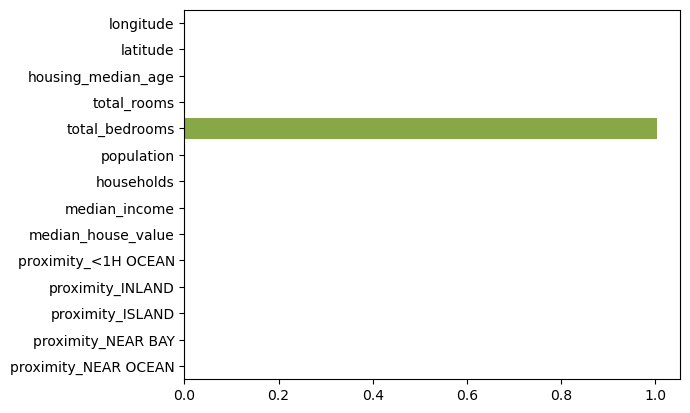

In [25]:
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0]*100,
    y=df.columns  
)

The column of total_bedrooms is full of null value,so it is better to drop this column.

In [26]:
df.drop(columns='total_bedrooms', inplace=True)


In [27]:
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


Generating histograms for each column

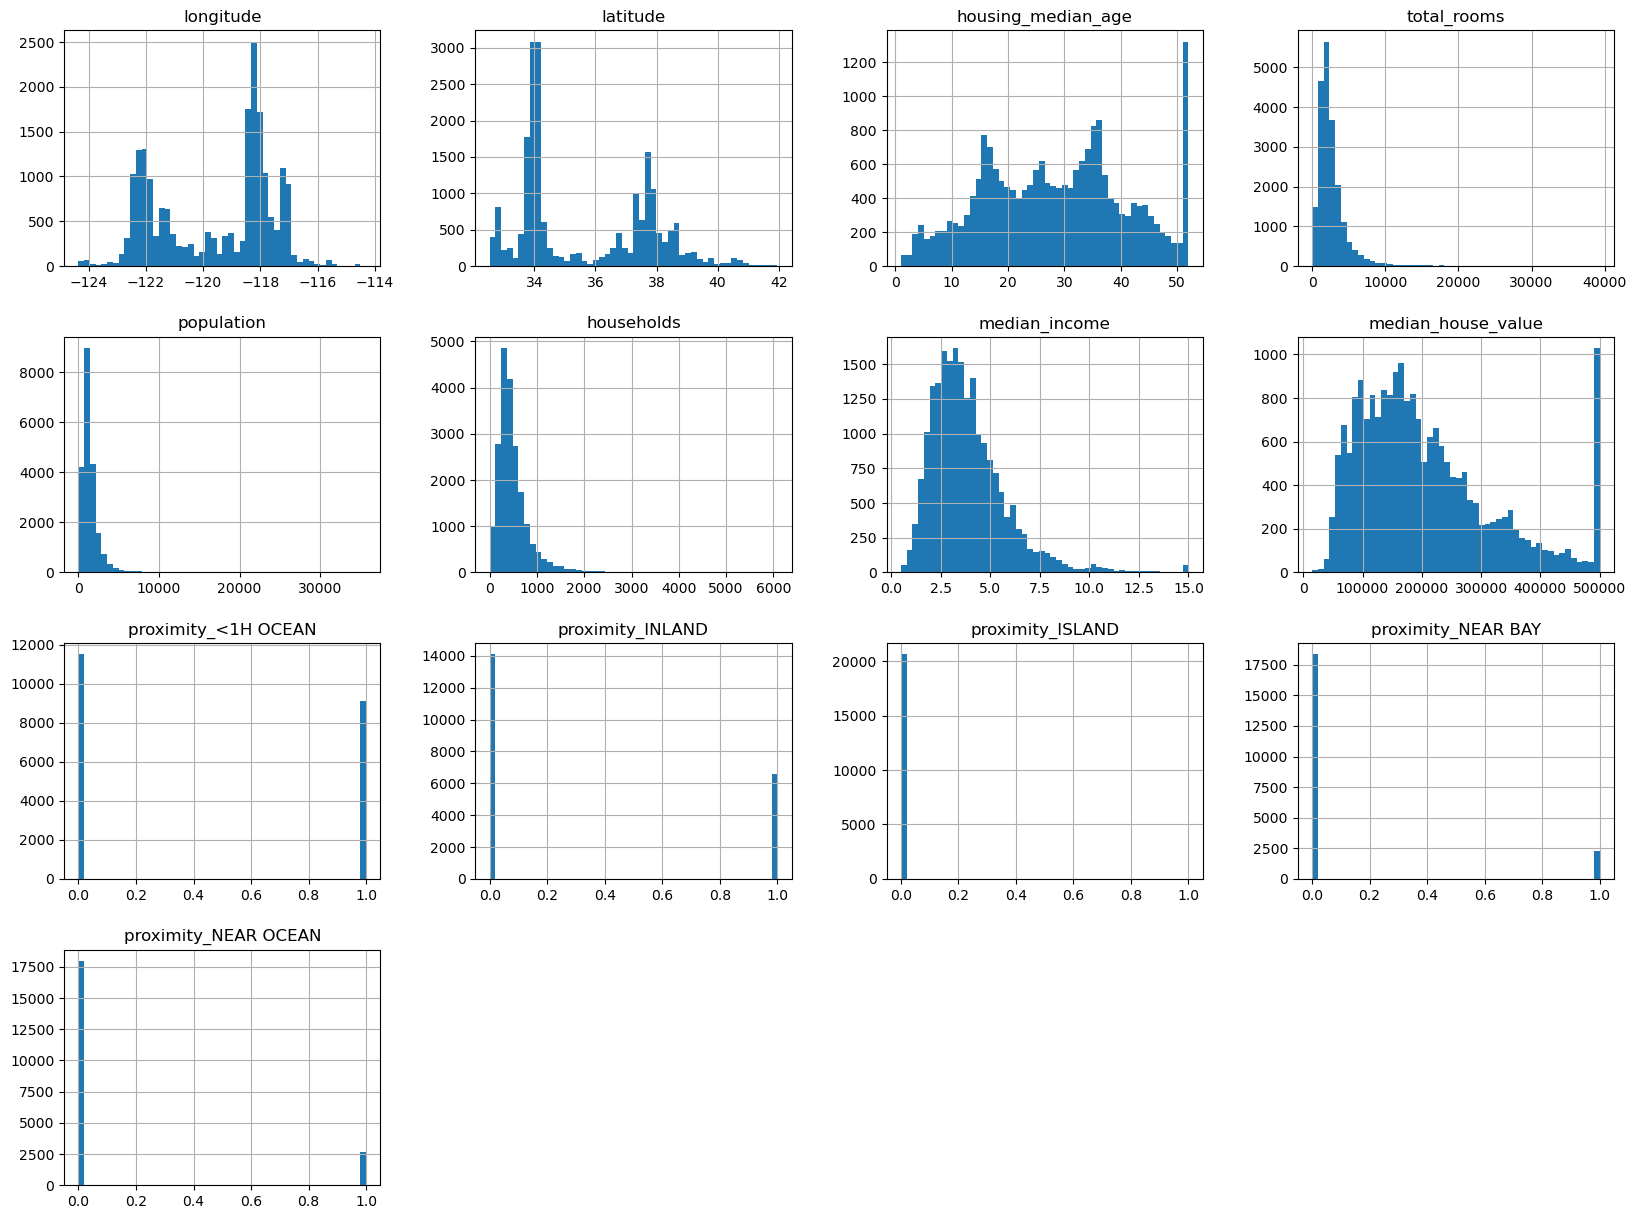

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Histogram of median house values

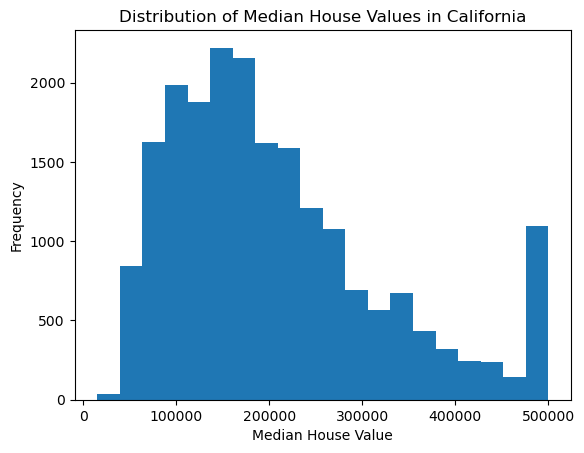

In [29]:
plt.hist(df['median_house_value'], bins=20)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values in California')
plt.show()

Visualize relationships between variables

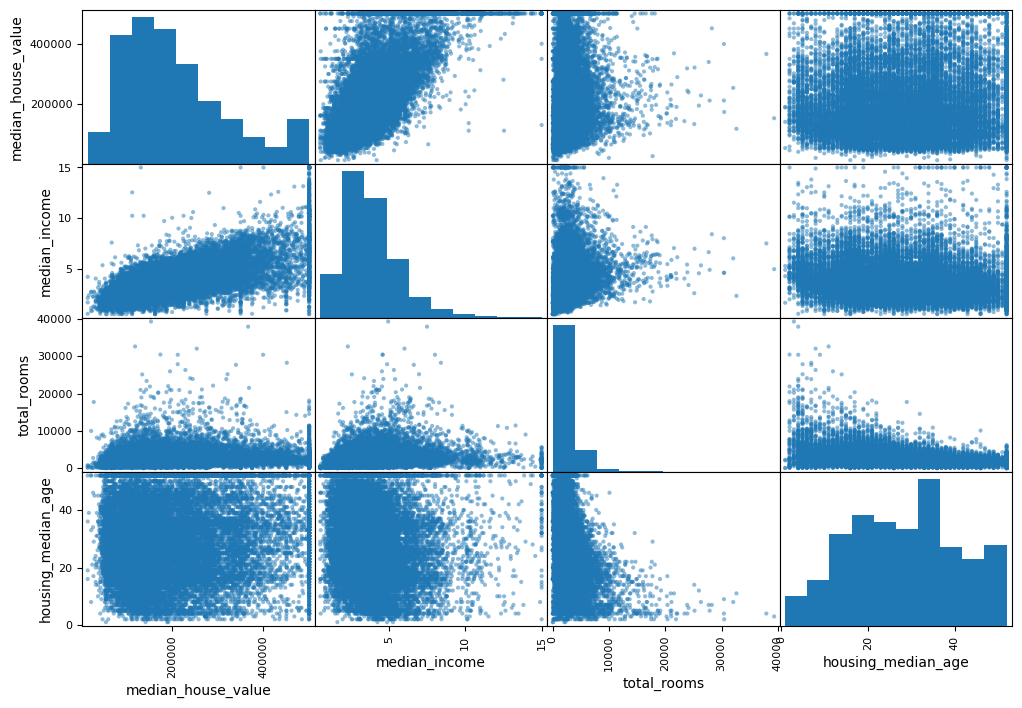

In [30]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

Modeling:    
I tried many models including: LassoCV, DecissionTreeRegression and LinearRegression. but the only model that had high R-squared was RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
X = df.drop('median_house_value', axis=1) 
y = df['median_house_value']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf.predict(X_test)


In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2372433414.7430696
Mean Absolute Error: 31412.87856589147
R-squared: 0.8189547344274276
